In [1]:
import pandas as pd
import acquire
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import prepare
import explore
import matplotlib.pyplot as plt

## 1 Use a python module containing datasets as a source from the iris data. 
### Create a pandas dataframe, df_iris, from this data.

In [ ]:
copy_paste_df = pd.read_clipboard()

In [ ]:
copy_paste_df.head()
#This came out weird. I'll just use the db in the mysql server.

In [ ]:
iris = sns.load_dataset("iris")

#### print the first 3 rows

In [ ]:
iris.head(3)

#### print the number of rows and columns (shape)

In [ ]:
iris.shape
print(f"The dataframe is {iris.shape[0]} rows tall and {iris.shape[1]} columns wide.")

#### print the column names

In [ ]:
iris.columns

#### print the data type of each column

In [ ]:
iris.dtypes

#### print the summary statistics for each of the numeric variables. 

In [ ]:
iris.describe()

####    Would you recommend rescaling the data based on these statistics?

In [ ]:
#No. They all look to be around the same scale. 0-10.

## 2 Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [ ]:
excel_df = pd.read_excel('Excel_Exercises.xlsx', index_col=0)

In [ ]:
excel_df.info()

### assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = excel_df.head(100)

### print the number of rows of your original dataframe

In [ ]:
print(f"The original dataframe has {excel_df.shape[0]} rows.")

### print the first 5 column names

In [ ]:
excel_df.columns[:5]

### print the column names that have a data type of object

In [ ]:
excel_df.dtypes[excel_df.dtypes == object]

### compute the range for each of the numeric variables.

In [ ]:
excel_df.dtypes[excel_df.dtypes != object]

In [ ]:
excel_df.monthly_charges.max() - excel_df.monthly_charges.min()

In [ ]:
excel_df.total_charges.max() - excel_df.total_charges.min()

In [ ]:
excel_df.total_charges.describe()

## A more sophisticated way. Useful when there is more than just 2 worth finding the range.

In [ ]:
#This blob is a 2 column dataframe with the float64 columns from excel_df
blob = excel_df.select_dtypes(include='float64')

In [ ]:
#we can find the max and min of each column by just calling those methods at the dataframe
#object. No need to even mention the columns, as long as you want all of them
blob.max() - blob.min()

In [ ]:
#Looks like it returns a pandaSeries with the columns as the loc.
type(blob.max() - blob.min())

## 3 Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_googlesheet = pd.read_csv(csv_export_url)

### print the first 3 rows

In [ ]:
df_googlesheet.head(3)

### print the number of rows and columns

In [ ]:
df_googlesheet.shape

### print the column names

In [ ]:
df_googlesheet.columns

### print the data type of each column

In [ ]:
df_googlesheet.dtypes

### print the summary statistics for each of the numeric variables

In [ ]:
df_googlesheet.describe()

### print the unique values for each of your categorical variables

In [ ]:
cats = excel_df.select_dtypes(include='object')

In [ ]:
cats.columns

In [ ]:
for i in cats.columns:
    #print(i)
    type(i)

In [ ]:
cats.gender.unique()

In [ ]:
for (columnName, columnData) in cats.iteritems():
   print('Colunm Name : ', columnName)
   print('Unique Values : ', columnData.unique())

In [ ]:
# Iterate over the sequence of column names
for column in cats:
   # Select column contents by column name using [] operator
   columnSeriesObj = cats[column]
   print('Column Name : ', column)
   print('Unique Values : ', columnSeriesObj.unique())

# _________

# EXPLORATION
## 1
### Split data into train (70%) & test (30%) samples.

In [3]:
df_iris = prepare.prep_iris()

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [5]:
def split_iris(df = df_iris, train_ratio=.70, seed=123):
    '''the function will take a dataframe and returns train and test dataframe split 
    where 80% is in train, and 20% in test. '''
    return train_test_split(df, train_size = train_ratio, random_state = seed)

In [6]:
train, test = split_iris()

In [7]:
train.shape

(105, 5)

## 2
### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [23]:
regressors = df_iris.select_dtypes(include=['float64'])

In [24]:
list(regressors.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [25]:
#I think this is a melted dataframe, going long on species
blob = pd.melt(df_iris, id_vars='species', value_vars=list(regressors.columns))
#blob = pd.melt(regressors, id_vars='species', value_vars=list(regressors.columns))

In [26]:
blob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
species     600 non-null int64
variable    600 non-null object
value       600 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB


In [28]:
blob.head(22)

,species,variable,value
0,0,sepal_length,5.1
1,0,sepal_length,4.9
2,0,sepal_length,4.7
3,0,sepal_length,4.6
4,0,sepal_length,5.0
5,0,sepal_length,5.4
6,0,sepal_length,4.6
7,0,sepal_length,5.0
8,0,sepal_length,4.4
9,0,sepal_length,4.9


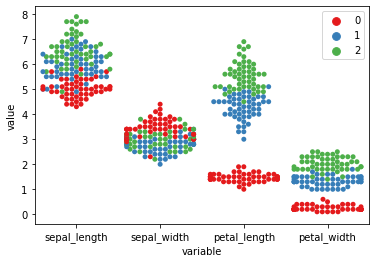

In [29]:
sns.swarmplot(x="variable", y="value", data=blob, hue="species", palette="Set1")
#ax = sns.boxplot(x="variable", y="value", data=blob,
#         showcaps=True,boxprops={'facecolor':'None'},
#         showfliers=True,whiskerprops={'linewidth':0})
plt.legend(loc=1)

In [ ]:
##Takeaways? The 0 Species seems to be the easiest to identify. It has some unique petal_length & petal_width
#values and counts. Petal length in general looks to have nice clear lines between the 0,1,2 species

## 3
### Create 4 subplots (2 rows x 2 columns) of scatterplots

### sepal_length x sepal_width
### petal_length x petal_width
### sepal_area x petal_area
### sepal_length x petal_length
### Make your figure size 14 x 8. What are your takeaways?

In [32]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


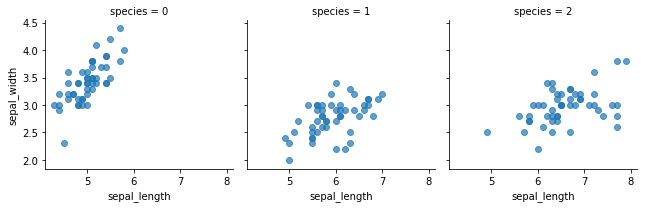

In [34]:
g = sns.FacetGrid(df_iris, col="species")
g.map(plt.scatter, "sepal_length","sepal_width", alpha=.7)
g.add_legend();

In [ ]:
#From the curriculo

from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

#call down the class and make this cmap object
cmap = cm.get_cmap('gnuplot')
#making the framing that will contain the cmap plots
axes = pd.plotting.scatter_matrix(
    df_iris[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

## 4
### Create a heatmap of each variable layering correlation coefficient on top.

In [35]:
regressors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


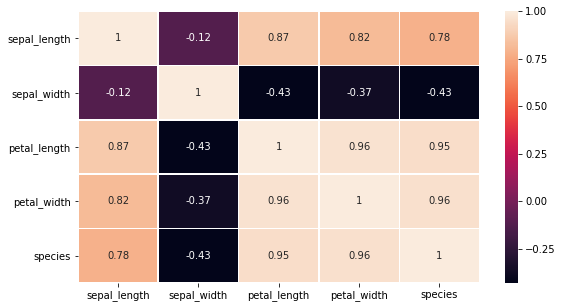

In [41]:
#pd.crosstab(train_df.pclass, train_df.survived, margins=True).style.background_gradient(cmap='YlOrRd')

plt.figure(figsize=(9,5))
sns.heatmap(df_iris.corr(), annot=True, linewidth=0.4)

## 5
### Create a scatter matrix visualizing the interaction of each variable

## 6

### Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

### must include null hypothesis, alternative hypothesis, t-test, results, summary
### H0: the difference in sepal length between virginica and versicolor is insignificant.
### Ha : the difference in sepal length between virginica and versicolor is substantial.
### We will test if the sepal length of virginica is significantly different than that of the versicolor.
### If there is difference, then variable sepal_length is a good choice to keep as a feature.
### We can use a t-test here, as sepal_length is somewhat normally distributed.